In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [179]:
amravati_meteo = pd.read_csv('/kaggle/input/andhra-pradesh-aqi-data/Andhra Pradesh/Metrological Data/Amravati.csv', skiprows = 2, delimiter=',')
amravati_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,16.3,78,0.0,974.7,5.5,7.1,58,105
1,2024-01-01T01:00,16.2,82,0.0,975.8,5.2,5.9,65,137
2,2024-01-01T02:00,17.5,76,0.0,976.8,7.4,12.5,113,141
3,2024-01-01T03:00,20.5,68,0.0,977.9,7.8,14.8,103,119
4,2024-01-01T04:00,23.1,58,0.0,978.9,6.4,8.6,106,112
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,20.1,82,0.0,977.0,9.8,19.5,44,41
8780,2024-12-31T20:00,19.6,85,0.0,976.5,10.7,20.9,48,46
8781,2024-12-31T21:00,19.1,86,0.0,975.9,11.5,22.5,55,52
8782,2024-12-31T22:00,18.8,87,0.0,975.5,10.8,21.5,58,58


In [180]:
amravati_pollutants = pd.read_csv('/kaggle/input/andhra-pradesh-aqi-data/Andhra Pradesh/Pollutants/Amravati.csv', delimiter= ',')
amravati_pollutants['Timestamp'] = amravati_meteo['time']
amravati_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
amravati_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,166.25,233.75,1.10,17.80,10.35,13.98,13.70,1.06,8.78,...,0.10,21.02,97.00,0.70,251.25,0.0,0.0,13.00,761.00,0.0
1,2024-01-01T01:00,160.50,216.50,2.10,14.22,9.28,15.15,14.10,0.94,10.55,...,0.10,21.42,96.25,0.62,240.25,0.0,0.0,13.00,760.75,0.0
2,2024-01-01T02:00,138.00,182.75,0.93,12.45,7.05,16.10,13.85,0.87,13.05,...,0.10,21.50,96.50,0.48,191.25,0.0,0.0,13.00,760.00,0.0
3,2024-01-01T03:00,130.00,176.75,2.25,10.85,7.62,16.32,14.70,0.92,12.60,...,0.10,21.48,97.50,0.75,286.75,0.0,0.0,13.00,760.00,0.0
4,2024-01-01T04:00,128.00,175.25,1.80,8.90,6.20,16.73,14.15,0.82,10.40,...,0.10,21.08,98.50,0.35,209.25,0.0,0.0,13.00,760.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,86.25,172.00,0.95,29.50,16.45,9.00,9.40,1.11,32.20,...,0.48,22.90,74.00,0.48,152.75,0.0,0.0,12.00,760.50,0.0
8780,2024-12-31T20:00,97.00,189.00,1.57,27.40,15.83,9.97,9.57,1.26,26.80,...,0.90,22.33,77.00,0.47,166.67,0.0,0.0,12.00,761.33,0.0
8781,2024-12-31T21:00,111.75,211.00,1.98,22.65,13.68,11.72,9.30,1.13,26.88,...,2.17,21.62,79.50,1.38,203.75,0.0,0.0,11.50,762.00,0.0
8782,2024-12-31T22:00,97.75,175.00,2.05,13.82,9.02,14.92,8.57,1.06,26.80,...,0.10,20.75,83.50,1.25,165.00,0.0,0.0,11.50,762.00,0.0


In [181]:
amravati = pd.merge(amravati_meteo.iloc[:, :], amravati_pollutants.iloc[:, 0:3], on='time')
amravati

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,16.3,78,0.0,974.7,5.5,7.1,58,105,166.25,233.75
1,2024-01-01T01:00,16.2,82,0.0,975.8,5.2,5.9,65,137,160.50,216.50
2,2024-01-01T02:00,17.5,76,0.0,976.8,7.4,12.5,113,141,138.00,182.75
3,2024-01-01T03:00,20.5,68,0.0,977.9,7.8,14.8,103,119,130.00,176.75
4,2024-01-01T04:00,23.1,58,0.0,978.9,6.4,8.6,106,112,128.00,175.25
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,20.1,82,0.0,977.0,9.8,19.5,44,41,86.25,172.00
8780,2024-12-31T20:00,19.6,85,0.0,976.5,10.7,20.9,48,46,97.00,189.00
8781,2024-12-31T21:00,19.1,86,0.0,975.9,11.5,22.5,55,52,111.75,211.00
8782,2024-12-31T22:00,18.8,87,0.0,975.5,10.8,21.5,58,58,97.75,175.00


In [182]:
amravati['city'] = 'Amravati'
amravati

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,16.3,78,0.0,974.7,5.5,7.1,58,105,166.25,233.75,Amravati
1,2024-01-01T01:00,16.2,82,0.0,975.8,5.2,5.9,65,137,160.50,216.50,Amravati
2,2024-01-01T02:00,17.5,76,0.0,976.8,7.4,12.5,113,141,138.00,182.75,Amravati
3,2024-01-01T03:00,20.5,68,0.0,977.9,7.8,14.8,103,119,130.00,176.75,Amravati
4,2024-01-01T04:00,23.1,58,0.0,978.9,6.4,8.6,106,112,128.00,175.25,Amravati
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,20.1,82,0.0,977.0,9.8,19.5,44,41,86.25,172.00,Amravati
8780,2024-12-31T20:00,19.6,85,0.0,976.5,10.7,20.9,48,46,97.00,189.00,Amravati
8781,2024-12-31T21:00,19.1,86,0.0,975.9,11.5,22.5,55,52,111.75,211.00,Amravati
8782,2024-12-31T22:00,18.8,87,0.0,975.5,10.8,21.5,58,58,97.75,175.00,Amravati


In [183]:
amravati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8299 non-null   float64
 10  PM10 (µg/m³)              8436 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [184]:
amravati = amravati.interpolate()
amravati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [188]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    amravati[delay1_col] = amravati[col].shift(1)
    delay2_col = col + "_delay2"
    amravati[delay2_col] = amravati[col].shift(2)
    amravati.loc[0, delay1_col] = amravati[col].iloc[-1]
    amravati.loc[1, delay2_col] = amravati[col].iloc[-1]
    amravati.loc[0, delay2_col] = amravati[col].iloc[-2]

amravati

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,16.3,78,0.0,974.7,5.5,7.1,58,105,166.25,233.75,Amravati,103.00,97.75,175.00,175.00
1,2024-01-01T01:00,16.2,82,0.0,975.8,5.2,5.9,65,137,160.50,216.50,Amravati,166.25,103.00,233.75,175.00
2,2024-01-01T02:00,17.5,76,0.0,976.8,7.4,12.5,113,141,138.00,182.75,Amravati,160.50,166.25,216.50,233.75
3,2024-01-01T03:00,20.5,68,0.0,977.9,7.8,14.8,103,119,130.00,176.75,Amravati,138.00,160.50,182.75,216.50
4,2024-01-01T04:00,23.1,58,0.0,978.9,6.4,8.6,106,112,128.00,175.25,Amravati,130.00,138.00,176.75,182.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,20.1,82,0.0,977.0,9.8,19.5,44,41,86.25,172.00,Amravati,75.50,63.75,142.75,118.75
8780,2024-12-31T20:00,19.6,85,0.0,976.5,10.7,20.9,48,46,97.00,189.00,Amravati,86.25,75.50,172.00,142.75
8781,2024-12-31T21:00,19.1,86,0.0,975.9,11.5,22.5,55,52,111.75,211.00,Amravati,97.00,86.25,189.00,172.00
8782,2024-12-31T22:00,18.8,87,0.0,975.5,10.8,21.5,58,58,97.75,175.00,Amravati,111.75,97.00,211.00,189.00


In [190]:
anantapur_meteo = pd.read_csv('/kaggle/input/andhra-pradesh-aqi-data/Andhra Pradesh/Metrological Data/Anantapur.csv', skiprows=2, delimiter=',')
anantapur_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,18.9,93,0.0,974.0,7.9,17.9,133,130
1,2024-01-01T01:00,19.3,90,0.0,975.5,6.2,14.6,126,128
2,2024-01-01T02:00,19.7,87,0.0,976.3,4.7,12.5,113,123
3,2024-01-01T03:00,21.5,77,0.0,977.1,6.6,8.9,112,117
4,2024-01-01T04:00,23.8,65,0.0,977.8,7.9,10.1,106,107
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,20.5,84,0.0,975.9,8.3,20.7,112,108
8780,2024-12-31T20:00,19.4,90,0.0,975.2,6.0,16.9,123,112
8781,2024-12-31T21:00,18.8,93,0.0,974.3,5.2,14.8,153,128
8782,2024-12-31T22:00,18.5,94,0.0,973.7,5.6,14.8,165,137


In [191]:
anantapur_pollutants = pd.read_csv('/kaggle/input/andhra-pradesh-aqi-data/Andhra Pradesh/Pollutants/Anantapur.csv', delimiter= ',')
anantapur_pollutants['Timestamp'] = anantapur_meteo['time']
anantapur_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
anantapur_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,29.86,71.90,2.00,18.30,11.76,11.10,NaN,0.50,27.96,...,0.04,23.99,67.70,0.31,101.51,0.0,0.0,0.69,739.76,-0.27
1,2024-01-01T01:00,31.17,73.34,2.02,14.84,9.94,11.22,NaN,0.48,32.94,...,0.03,23.55,73.34,0.30,88.20,0.0,0.0,0.66,738.93,-0.27
2,2024-01-01T02:00,35.28,113.35,2.00,13.82,9.38,11.22,NaN,0.54,33.56,...,0.02,23.12,77.75,0.20,84.67,0.0,0.0,0.68,737.46,-0.27
3,2024-01-01T03:00,37.47,105.13,2.00,13.82,9.38,11.19,NaN,0.54,31.55,...,0.02,22.91,79.37,0.13,90.09,0.0,0.0,0.59,735.62,-0.27
4,2024-01-01T04:00,37.44,101.28,2.01,14.68,9.84,11.22,NaN,0.51,28.17,...,0.03,22.40,81.59,0.15,46.75,0.0,0.0,0.74,735.90,-0.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,30.55,55.38,NaN,NaN,NaN,NaN,10.11,0.21,18.31,...,0.55,24.56,54.91,0.12,67.24,0.0,0.0,0.46,739.18,-0.27
8780,2024-12-31T20:00,30.96,56.08,NaN,NaN,NaN,NaN,9.98,0.16,23.02,...,0.55,24.39,57.50,0.24,95.36,0.0,0.0,0.33,741.86,-0.27
8781,2024-12-31T21:00,27.80,50.70,NaN,NaN,NaN,NaN,9.96,0.14,24.51,...,0.55,23.93,59.71,0.23,87.66,0.0,0.0,0.47,743.80,-0.27
8782,2024-12-31T22:00,28.05,51.12,NaN,NaN,NaN,NaN,9.93,0.12,25.29,...,0.56,23.52,62.58,0.26,99.78,0.0,0.0,0.40,744.09,-0.27


In [192]:
anantapur = pd.merge(anantapur_meteo.iloc[:, :], anantapur_pollutants.iloc[:, 0:3], on='time')
anantapur

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,18.9,93,0.0,974.0,7.9,17.9,133,130,29.86,71.90
1,2024-01-01T01:00,19.3,90,0.0,975.5,6.2,14.6,126,128,31.17,73.34
2,2024-01-01T02:00,19.7,87,0.0,976.3,4.7,12.5,113,123,35.28,113.35
3,2024-01-01T03:00,21.5,77,0.0,977.1,6.6,8.9,112,117,37.47,105.13
4,2024-01-01T04:00,23.8,65,0.0,977.8,7.9,10.1,106,107,37.44,101.28
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,20.5,84,0.0,975.9,8.3,20.7,112,108,30.55,55.38
8780,2024-12-31T20:00,19.4,90,0.0,975.2,6.0,16.9,123,112,30.96,56.08
8781,2024-12-31T21:00,18.8,93,0.0,974.3,5.2,14.8,153,128,27.80,50.70
8782,2024-12-31T22:00,18.5,94,0.0,973.7,5.6,14.8,165,137,28.05,51.12


In [193]:
anantapur['city'] = 'Anantapur'
anantapur

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,18.9,93,0.0,974.0,7.9,17.9,133,130,29.86,71.90,Anantapur
1,2024-01-01T01:00,19.3,90,0.0,975.5,6.2,14.6,126,128,31.17,73.34,Anantapur
2,2024-01-01T02:00,19.7,87,0.0,976.3,4.7,12.5,113,123,35.28,113.35,Anantapur
3,2024-01-01T03:00,21.5,77,0.0,977.1,6.6,8.9,112,117,37.47,105.13,Anantapur
4,2024-01-01T04:00,23.8,65,0.0,977.8,7.9,10.1,106,107,37.44,101.28,Anantapur
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,20.5,84,0.0,975.9,8.3,20.7,112,108,30.55,55.38,Anantapur
8780,2024-12-31T20:00,19.4,90,0.0,975.2,6.0,16.9,123,112,30.96,56.08,Anantapur
8781,2024-12-31T21:00,18.8,93,0.0,974.3,5.2,14.8,153,128,27.80,50.70,Anantapur
8782,2024-12-31T22:00,18.5,94,0.0,973.7,5.6,14.8,165,137,28.05,51.12,Anantapur


In [194]:
anantapur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             7033 non-null   float64
 10  PM10 (µg/m³)              7056 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [195]:
anantapur = anantapur.interpolate()
anantapur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [196]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    anantapur[delay1_col] = anantapur[col].shift(1)
    delay2_col = col + "_delay2"
    anantapur[delay2_col] = anantapur[col].shift(2)
    anantapur.loc[0, delay1_col] = anantapur[col].iloc[-1]
    anantapur.loc[1, delay2_col] = anantapur[col].iloc[-1]
    anantapur.loc[0, delay2_col] = anantapur[col].iloc[-2]

anantapur

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,18.9,93,0.0,974.0,7.9,17.9,133,130,29.86,71.90,Anantapur,28.98,28.05,52.71,51.12
1,2024-01-01T01:00,19.3,90,0.0,975.5,6.2,14.6,126,128,31.17,73.34,Anantapur,29.86,28.98,71.90,52.71
2,2024-01-01T02:00,19.7,87,0.0,976.3,4.7,12.5,113,123,35.28,113.35,Anantapur,31.17,29.86,73.34,71.90
3,2024-01-01T03:00,21.5,77,0.0,977.1,6.6,8.9,112,117,37.47,105.13,Anantapur,35.28,31.17,113.35,73.34
4,2024-01-01T04:00,23.8,65,0.0,977.8,7.9,10.1,106,107,37.44,101.28,Anantapur,37.47,35.28,105.13,113.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,20.5,84,0.0,975.9,8.3,20.7,112,108,30.55,55.38,Anantapur,28.90,26.70,52.56,48.82
8780,2024-12-31T20:00,19.4,90,0.0,975.2,6.0,16.9,123,112,30.96,56.08,Anantapur,30.55,28.90,55.38,52.56
8781,2024-12-31T21:00,18.8,93,0.0,974.3,5.2,14.8,153,128,27.80,50.70,Anantapur,30.96,30.55,56.08,55.38
8782,2024-12-31T22:00,18.5,94,0.0,973.7,5.6,14.8,165,137,28.05,51.12,Anantapur,27.80,30.96,50.70,56.08


In [197]:
chittoor_meteo = pd.read_csv('/kaggle/input/andhra-pradesh-aqi-data/Andhra Pradesh/Metrological Data/Chittoor.csv', skiprows=2, delimiter=',')
chittoor_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,17.7,98,0.0,977.7,4.6,9.7,309,360
1,2024-01-01T01:00,18.7,98,0.0,979.0,4.8,10.8,312,356
2,2024-01-01T02:00,19.9,94,0.0,979.8,6.6,10.8,315,360
3,2024-01-01T03:00,22.2,84,0.0,980.8,4.8,6.8,13,18
4,2024-01-01T04:00,24.1,73,0.0,981.2,5.1,6.5,51,56
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,19.5,95,0.0,979.2,4.0,13.6,360,26
8780,2024-12-31T20:00,19.0,95,0.0,978.3,3.6,12.5,333,20
8781,2024-12-31T21:00,18.6,95,0.0,977.5,4.8,13.0,323,10
8782,2024-12-31T22:00,18.1,95,0.0,976.9,4.5,12.3,317,12


In [198]:
chittoor_pollutants = pd.read_csv('/kaggle/input/andhra-pradesh-aqi-data/Andhra Pradesh/Pollutants/Chittoor.csv', delimiter= ',')
chittoor_pollutants['Timestamp'] = chittoor_meteo['time']
chittoor_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
chittoor_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,38.79,66.30,0.60,23.60,24.06,11.64,4.94,3.10,23.36,...,0.08,23.06,87.61,1.51,215.74,0.0,0.0,9.49,740.04,0.91
1,2024-01-01T01:00,39.92,68.19,0.04,21.70,21.71,9.62,3.01,1.27,11.18,...,0.10,22.62,91.64,2.01,157.91,0.0,0.0,9.46,738.60,1.11
2,2024-01-01T02:00,43.40,74.00,NaN,22.95,22.95,10.48,1.70,1.21,15.21,...,0.11,22.76,89.74,1.33,174.09,0.0,0.0,9.64,737.52,0.93
3,2024-01-01T03:00,45.64,77.71,NaN,17.36,17.36,9.22,1.55,1.20,41.85,...,0.10,22.83,84.26,1.71,311.37,0.0,0.0,9.53,736.16,0.90
4,2024-01-01T04:00,48.70,82.83,NaN,13.29,13.29,7.97,1.23,1.14,32.24,...,0.08,22.24,89.40,1.42,227.20,0.0,0.0,9.31,736.82,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8780,2024-12-31T20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8781,2024-12-31T21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8782,2024-12-31T22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [199]:
chittoor = pd.merge(chittoor_meteo.iloc[:, :], chittoor_pollutants.iloc[:, 0:3], on='time')
chittoor

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,17.7,98,0.0,977.7,4.6,9.7,309,360,38.79,66.30
1,2024-01-01T01:00,18.7,98,0.0,979.0,4.8,10.8,312,356,39.92,68.19
2,2024-01-01T02:00,19.9,94,0.0,979.8,6.6,10.8,315,360,43.40,74.00
3,2024-01-01T03:00,22.2,84,0.0,980.8,4.8,6.8,13,18,45.64,77.71
4,2024-01-01T04:00,24.1,73,0.0,981.2,5.1,6.5,51,56,48.70,82.83
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,19.5,95,0.0,979.2,4.0,13.6,360,26,NaN,NaN
8780,2024-12-31T20:00,19.0,95,0.0,978.3,3.6,12.5,333,20,NaN,NaN
8781,2024-12-31T21:00,18.6,95,0.0,977.5,4.8,13.0,323,10,NaN,NaN
8782,2024-12-31T22:00,18.1,95,0.0,976.9,4.5,12.3,317,12,NaN,NaN


In [200]:
chittoor['city'] = 'Chittoor'
chittoor

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,17.7,98,0.0,977.7,4.6,9.7,309,360,38.79,66.30,Chittoor
1,2024-01-01T01:00,18.7,98,0.0,979.0,4.8,10.8,312,356,39.92,68.19,Chittoor
2,2024-01-01T02:00,19.9,94,0.0,979.8,6.6,10.8,315,360,43.40,74.00,Chittoor
3,2024-01-01T03:00,22.2,84,0.0,980.8,4.8,6.8,13,18,45.64,77.71,Chittoor
4,2024-01-01T04:00,24.1,73,0.0,981.2,5.1,6.5,51,56,48.70,82.83,Chittoor
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,19.5,95,0.0,979.2,4.0,13.6,360,26,NaN,NaN,Chittoor
8780,2024-12-31T20:00,19.0,95,0.0,978.3,3.6,12.5,333,20,NaN,NaN,Chittoor
8781,2024-12-31T21:00,18.6,95,0.0,977.5,4.8,13.0,323,10,NaN,NaN,Chittoor
8782,2024-12-31T22:00,18.1,95,0.0,976.9,4.5,12.3,317,12,NaN,NaN,Chittoor


In [201]:
chittoor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             6821 non-null   float64
 10  PM10 (µg/m³)              6823 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [202]:
chittoor = chittoor.interpolate()
chittoor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [203]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    chittoor[delay1_col] = chittoor[col].shift(1)
    delay2_col = col + "_delay2"
    chittoor[delay2_col] = chittoor[col].shift(2)
    chittoor.loc[0, delay1_col] = chittoor[col].iloc[-1]
    chittoor.loc[1, delay2_col] = chittoor[col].iloc[-1]
    chittoor.loc[0, delay2_col] = chittoor[col].iloc[-2]

chittoor

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,17.7,98,0.0,977.7,4.6,9.7,309,360,38.79,66.30,Chittoor,49.60,49.60,74.96,74.96
1,2024-01-01T01:00,18.7,98,0.0,979.0,4.8,10.8,312,356,39.92,68.19,Chittoor,38.79,49.60,66.30,74.96
2,2024-01-01T02:00,19.9,94,0.0,979.8,6.6,10.8,315,360,43.40,74.00,Chittoor,39.92,38.79,68.19,66.30
3,2024-01-01T03:00,22.2,84,0.0,980.8,4.8,6.8,13,18,45.64,77.71,Chittoor,43.40,39.92,74.00,68.19
4,2024-01-01T04:00,24.1,73,0.0,981.2,5.1,6.5,51,56,48.70,82.83,Chittoor,45.64,43.40,77.71,74.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,19.5,95,0.0,979.2,4.0,13.6,360,26,49.60,74.96,Chittoor,49.60,49.60,74.96,74.96
8780,2024-12-31T20:00,19.0,95,0.0,978.3,3.6,12.5,333,20,49.60,74.96,Chittoor,49.60,49.60,74.96,74.96
8781,2024-12-31T21:00,18.6,95,0.0,977.5,4.8,13.0,323,10,49.60,74.96,Chittoor,49.60,49.60,74.96,74.96
8782,2024-12-31T22:00,18.1,95,0.0,976.9,4.5,12.3,317,12,49.60,74.96,Chittoor,49.60,49.60,74.96,74.96


In [86]:
kadapa_meteo = pd.read_csv('/kaggle/input/andhra-pradesh-aqi-data/Andhra Pradesh/Metrological Data/Kadapa.csv', skiprows=2, delimiter = ',')
kadapa_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,18.8,96,0.0,998.5,6.0,16.1,123,119
1,2024-01-01T01:00,19.5,97,0.0,999.7,4.8,14.1,132,128
2,2024-01-01T02:00,20.6,92,0.0,1000.6,4.6,10.2,129,129
3,2024-01-01T03:00,23.1,80,0.0,1001.4,3.1,5.2,111,115
4,2024-01-01T04:00,25.7,66,0.0,1001.9,10.0,13.0,103,104
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,20.5,92,0.0,1000.1,6.3,14.9,127,117
8780,2024-12-31T20:00,20.2,93,0.0,999.4,5.8,14.2,126,119
8781,2024-12-31T21:00,19.7,95,0.0,998.7,5.0,12.5,128,118
8782,2024-12-31T22:00,19.2,97,0.0,998.1,3.7,9.7,133,119


In [87]:
kadapa_pollutants = pd.read_csv('/kaggle/input/andhra-pradesh-aqi-data/Andhra Pradesh/Pollutants/Kadapa.csv', delimiter= ',')
kadapa_pollutants['Timestamp'] = kadapa_meteo['time']
kadapa_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
kadapa_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,2024-01-01T01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,2024-01-01T02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,2024-01-01T03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,2024-01-01T04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,31.13,56.68,10.00,9.96,13.40,18.46,12.52,0.22,25.11,...,0.94,30.07,69.23,0.15,249.18,0.0,0.0,1.50,779.89,2.06
8780,2024-12-31T20:00,56.20,101.38,10.00,11.81,14.38,18.91,12.48,0.23,25.11,...,0.95,29.66,72.14,0.15,259.65,0.0,0.0,1.48,783.38,2.30
8781,2024-12-31T21:00,63.53,114.44,10.87,15.11,16.84,20.02,12.57,0.24,25.11,...,0.94,29.21,75.68,0.14,272.40,0.0,0.0,1.50,784.91,2.14
8782,2024-12-31T22:00,38.61,70.02,10.00,10.81,13.86,18.66,12.08,0.18,25.11,...,0.93,28.88,78.19,0.11,281.61,0.0,0.0,1.45,785.04,2.19


In [88]:
kadapa = pd.merge(kadapa_meteo.iloc[:, :], kadapa_pollutants.iloc[:, 0:3], on='time')
kadapa

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,18.8,96,0.0,998.5,6.0,16.1,123,119,NaN,NaN
1,2024-01-01T01:00,19.5,97,0.0,999.7,4.8,14.1,132,128,NaN,NaN
2,2024-01-01T02:00,20.6,92,0.0,1000.6,4.6,10.2,129,129,NaN,NaN
3,2024-01-01T03:00,23.1,80,0.0,1001.4,3.1,5.2,111,115,NaN,NaN
4,2024-01-01T04:00,25.7,66,0.0,1001.9,10.0,13.0,103,104,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,20.5,92,0.0,1000.1,6.3,14.9,127,117,31.13,56.68
8780,2024-12-31T20:00,20.2,93,0.0,999.4,5.8,14.2,126,119,56.20,101.38
8781,2024-12-31T21:00,19.7,95,0.0,998.7,5.0,12.5,128,118,63.53,114.44
8782,2024-12-31T22:00,19.2,97,0.0,998.1,3.7,9.7,133,119,38.61,70.02


In [89]:
kadapa['city'] = 'Kadapa'

In [90]:
kadapa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             6777 non-null   float64
 10  PM10 (µg/m³)              6774 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [91]:
kadapa = kadapa.interpolate()
kadapa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8754 non-null   float64
 10  PM10 (µg/m³)              8754 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [92]:
for column in kadapa.columns:
    kadapa[column].fillna(kadapa[column].mode()[0], inplace=True)

kadapa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [204]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    kadapa[delay1_col] = kadapa[col].shift(1)
    delay2_col = col + "_delay2"
    kadapa[delay2_col] = kadapa[col].shift(2)
    kadapa.loc[0, delay1_col] = kadapa[col].iloc[-1]
    kadapa.loc[1, delay2_col] = kadapa[col].iloc[-1]
    kadapa.loc[0, delay2_col] = kadapa[col].iloc[-2]

kadapa

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,18.8,96,0.0,998.5,6.0,16.1,123,119,19.40,28.60,Kadapa,43.70,38.61,79.10,70.02
1,2024-01-01T01:00,19.5,97,0.0,999.7,4.8,14.1,132,128,19.40,28.60,Kadapa,19.40,43.70,28.60,79.10
2,2024-01-01T02:00,20.6,92,0.0,1000.6,4.6,10.2,129,129,19.40,28.60,Kadapa,19.40,19.40,28.60,28.60
3,2024-01-01T03:00,23.1,80,0.0,1001.4,3.1,5.2,111,115,19.40,28.60,Kadapa,19.40,19.40,28.60,28.60
4,2024-01-01T04:00,25.7,66,0.0,1001.9,10.0,13.0,103,104,19.40,28.60,Kadapa,19.40,19.40,28.60,28.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,20.5,92,0.0,1000.1,6.3,14.9,127,117,31.13,56.68,Kadapa,29.63,27.16,54.01,49.61
8780,2024-12-31T20:00,20.2,93,0.0,999.4,5.8,14.2,126,119,56.20,101.38,Kadapa,31.13,29.63,56.68,54.01
8781,2024-12-31T21:00,19.7,95,0.0,998.7,5.0,12.5,128,118,63.53,114.44,Kadapa,56.20,31.13,101.38,56.68
8782,2024-12-31T22:00,19.2,97,0.0,998.1,3.7,9.7,133,119,38.61,70.02,Kadapa,63.53,56.20,114.44,101.38


In [93]:
rajamahendravaram_meteo = pd.read_csv('/kaggle/input/andhra-pradesh-aqi-data/Andhra Pradesh/Metrological Data/Rajamahendravaram.csv', skiprows=2, delimiter = ',')
rajamahendravaram_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,19.8,94,0.0,1011.1,7.1,16.8,41,48
1,2024-01-01T01:00,20.3,93,0.0,1012.0,7.1,15.8,30,43
2,2024-01-01T02:00,21.4,87,0.0,1012.8,9.1,17.2,18,33
3,2024-01-01T03:00,23.7,74,0.0,1013.5,8.6,12.1,33,37
4,2024-01-01T04:00,25.5,66,0.0,1013.7,8.1,10.0,69,69
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,21.8,97,0.0,1011.8,5.2,14.3,49,65
8780,2024-12-31T20:00,21.7,98,0.0,1010.9,5.1,14.4,39,60
8781,2024-12-31T21:00,21.5,98,0.0,1010.2,5.0,13.2,30,46
8782,2024-12-31T22:00,21.4,98,0.0,1009.7,5.6,15.0,48,56


In [94]:
rajamahendravaram_pollutants = pd.read_csv('/kaggle/input/andhra-pradesh-aqi-data/Andhra Pradesh/Pollutants/Rajamahendravaram.csv', delimiter= ',')
rajamahendravaram_pollutants['Timestamp'] = rajamahendravaram_meteo['time']
rajamahendravaram_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
rajamahendravaram_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,130.00,188.00,3.18,28.08,17.55,15.50,18.88,0.97,17.25,...,0.25,30.98,78.75,0.95,121.25,0.0,0.0,3.0,759.00,0.01
1,2024-01-01T01:00,155.50,231.25,2.28,19.35,12.12,15.95,19.00,1.00,17.48,...,0.20,30.95,79.00,0.45,155.00,0.0,0.0,3.0,759.00,0.01
2,2024-01-01T02:00,122.75,168.25,1.90,19.48,11.48,14.98,17.08,0.93,16.90,...,0.15,30.75,80.75,0.35,261.75,0.0,0.0,3.0,758.25,0.01
3,2024-01-01T03:00,117.50,157.25,3.42,16.98,11.80,14.40,16.65,0.68,16.05,...,0.15,30.12,80.75,0.25,256.50,0.0,0.0,3.0,758.00,0.01
4,2024-01-01T04:00,115.75,161.50,2.10,17.00,10.75,15.82,16.45,0.58,17.18,...,0.15,29.55,82.00,0.40,181.50,0.0,0.0,3.0,758.25,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,81.50,162.75,2.90,30.80,17.60,18.08,15.12,1.23,3.60,...,0.98,25.20,78.00,4.60,101.50,0.0,0.0,3.0,758.50,0.07
8780,2024-12-31T20:00,90.25,154.00,2.10,24.22,14.60,18.52,14.35,1.25,3.50,...,0.90,24.42,85.25,3.60,96.25,0.0,0.0,3.0,759.50,0.05
8781,2024-12-31T21:00,94.00,157.00,0.90,24.50,13.08,19.40,14.12,1.21,4.50,...,0.80,23.95,91.75,1.78,98.25,0.0,0.0,3.0,760.00,0.02
8782,2024-12-31T22:00,95.50,162.50,2.22,23.08,14.05,17.60,14.08,1.10,5.52,...,0.72,24.75,94.75,1.32,90.50,0.0,0.0,3.0,760.00,0.02


In [95]:
rajamahendravaram = pd.merge(rajamahendravaram_meteo.iloc[:, :], rajamahendravaram_pollutants.iloc[:, 0:3], on='time')
rajamahendravaram

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,19.8,94,0.0,1011.1,7.1,16.8,41,48,130.00,188.00
1,2024-01-01T01:00,20.3,93,0.0,1012.0,7.1,15.8,30,43,155.50,231.25
2,2024-01-01T02:00,21.4,87,0.0,1012.8,9.1,17.2,18,33,122.75,168.25
3,2024-01-01T03:00,23.7,74,0.0,1013.5,8.6,12.1,33,37,117.50,157.25
4,2024-01-01T04:00,25.5,66,0.0,1013.7,8.1,10.0,69,69,115.75,161.50
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,21.8,97,0.0,1011.8,5.2,14.3,49,65,81.50,162.75
8780,2024-12-31T20:00,21.7,98,0.0,1010.9,5.1,14.4,39,60,90.25,154.00
8781,2024-12-31T21:00,21.5,98,0.0,1010.2,5.0,13.2,30,46,94.00,157.00
8782,2024-12-31T22:00,21.4,98,0.0,1009.7,5.6,15.0,48,56,95.50,162.50


In [96]:
rajamahendravaram['city'] = 'Rajamahendravaram'
rajamahendravaram.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8294 non-null   float64
 10  PM10 (µg/m³)              8325 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [97]:
rajamahendravaram = rajamahendravaram.interpolate()
rajamahendravaram.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [205]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    rajamahendravaram[delay1_col] = rajamahendravaram[col].shift(1)
    delay2_col = col + "_delay2"
    rajamahendravaram[delay2_col] = rajamahendravaram[col].shift(2)
    rajamahendravaram.loc[0, delay1_col] = rajamahendravaram[col].iloc[-1]
    rajamahendravaram.loc[1, delay2_col] = rajamahendravaram[col].iloc[-1]
    rajamahendravaram.loc[0, delay2_col] = rajamahendravaram[col].iloc[-2]

rajamahendravaram

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,19.8,94,0.0,1011.1,7.1,16.8,41,48,130.00,188.00,Rajamahendravaram,100.00,95.50,179.00,162.50
1,2024-01-01T01:00,20.3,93,0.0,1012.0,7.1,15.8,30,43,155.50,231.25,Rajamahendravaram,130.00,100.00,188.00,179.00
2,2024-01-01T02:00,21.4,87,0.0,1012.8,9.1,17.2,18,33,122.75,168.25,Rajamahendravaram,155.50,130.00,231.25,188.00
3,2024-01-01T03:00,23.7,74,0.0,1013.5,8.6,12.1,33,37,117.50,157.25,Rajamahendravaram,122.75,155.50,168.25,231.25
4,2024-01-01T04:00,25.5,66,0.0,1013.7,8.1,10.0,69,69,115.75,161.50,Rajamahendravaram,117.50,122.75,157.25,168.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,21.8,97,0.0,1011.8,5.2,14.3,49,65,81.50,162.75,Rajamahendravaram,81.25,75.25,165.25,145.50
8780,2024-12-31T20:00,21.7,98,0.0,1010.9,5.1,14.4,39,60,90.25,154.00,Rajamahendravaram,81.50,81.25,162.75,165.25
8781,2024-12-31T21:00,21.5,98,0.0,1010.2,5.0,13.2,30,46,94.00,157.00,Rajamahendravaram,90.25,81.50,154.00,162.75
8782,2024-12-31T22:00,21.4,98,0.0,1009.7,5.6,15.0,48,56,95.50,162.50,Rajamahendravaram,94.00,90.25,157.00,154.00


In [98]:
tirupati_meteo = pd.read_csv('/kaggle/input/andhra-pradesh-aqi-data/Andhra Pradesh/Metrological Data/Tirupati.csv', skiprows=2, delimiter = ',')
tirupati_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,18.0,96,0.0,996.0,3.3,6.5,311,3
1,2024-01-01T01:00,18.6,97,0.0,997.2,2.8,6.2,310,353
2,2024-01-01T02:00,20.0,94,0.0,998.1,4.3,5.4,312,356
3,2024-01-01T03:00,23.1,85,0.0,998.8,1.9,2.9,338,7
4,2024-01-01T04:00,24.7,76,0.0,999.4,5.1,6.4,45,43
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,20.2,96,0.0,997.5,3.2,7.7,313,3
8780,2024-12-31T20:00,20.1,97,0.0,996.7,3.5,6.3,298,357
8781,2024-12-31T21:00,20.1,97,0.0,995.9,4.6,6.3,296,347
8782,2024-12-31T22:00,20.0,96,0.0,995.2,4.8,6.2,290,343


In [99]:
tirupati_pollutants = pd.read_csv('/kaggle/input/andhra-pradesh-aqi-data/Andhra Pradesh/Pollutants/Tirupati.csv', delimiter= ',')
tirupati_pollutants['Timestamp'] = tirupati_meteo['time']
tirupati_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
tirupati_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,2024-01-01T01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,2024-01-01T02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,2024-01-01T03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,2024-01-01T04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,175.98,311.69,5.12,34.11,22.30,23.88,5.40,0.99,40.9,...,0.3,24.26,78.87,0.08,256.68,0.0,0.0,22.86,736.41,11.80
8780,2024-12-31T20:00,130.96,231.29,5.11,41.10,26.01,29.14,4.90,1.02,40.9,...,0.3,23.84,80.42,0.04,109.34,0.0,0.0,22.87,738.52,9.50
8781,2024-12-31T21:00,106.51,187.64,5.19,32.52,21.52,22.75,4.77,1.01,40.9,...,0.3,23.76,78.24,0.18,267.50,0.0,0.0,22.53,739.88,18.99
8782,2024-12-31T22:00,114.18,201.32,5.28,23.44,16.76,15.95,5.08,0.98,40.9,...,0.3,23.56,77.56,0.08,322.36,0.0,0.0,22.88,740.21,18.56


In [100]:
tirupati = pd.merge(tirupati_meteo.iloc[:, :], tirupati_pollutants.iloc[:, 0:3], on='time')
tirupati

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,18.0,96,0.0,996.0,3.3,6.5,311,3,NaN,NaN
1,2024-01-01T01:00,18.6,97,0.0,997.2,2.8,6.2,310,353,NaN,NaN
2,2024-01-01T02:00,20.0,94,0.0,998.1,4.3,5.4,312,356,NaN,NaN
3,2024-01-01T03:00,23.1,85,0.0,998.8,1.9,2.9,338,7,NaN,NaN
4,2024-01-01T04:00,24.7,76,0.0,999.4,5.1,6.4,45,43,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,20.2,96,0.0,997.5,3.2,7.7,313,3,175.98,311.69
8780,2024-12-31T20:00,20.1,97,0.0,996.7,3.5,6.3,298,357,130.96,231.29
8781,2024-12-31T21:00,20.1,97,0.0,995.9,4.6,6.3,296,347,106.51,187.64
8782,2024-12-31T22:00,20.0,96,0.0,995.2,4.8,6.2,290,343,114.18,201.32


In [101]:
tirupati['city'] = 'Tirupati'

In [102]:
tirupati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             6314 non-null   float64
 10  PM10 (µg/m³)              6313 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [103]:
tirupati = tirupati.interpolate()
tirupati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8762 non-null   float64
 10  PM10 (µg/m³)              8762 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [104]:
for column in tirupati.columns:
    tirupati[column].fillna(tirupati[column].mode()[0], inplace=True)

tirupati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [206]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    tirupati[delay1_col] = tirupati[col].shift(1)
    delay2_col = col + "_delay2"
    tirupati[delay2_col] = tirupati[col].shift(2)
    tirupati.loc[0, delay1_col] = tirupati[col].iloc[-1]
    tirupati.loc[1, delay2_col] = tirupati[col].iloc[-1]
    tirupati.loc[0, delay2_col] = tirupati[col].iloc[-2]

tirupati

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,18.0,96,0.0,996.0,3.3,6.5,311,3,7.68,12.95,Tirupati,94.30,114.18,165.82,201.32
1,2024-01-01T01:00,18.6,97,0.0,997.2,2.8,6.2,310,353,7.68,12.95,Tirupati,7.68,94.30,12.95,165.82
2,2024-01-01T02:00,20.0,94,0.0,998.1,4.3,5.4,312,356,7.68,12.95,Tirupati,7.68,7.68,12.95,12.95
3,2024-01-01T03:00,23.1,85,0.0,998.8,1.9,2.9,338,7,7.68,12.95,Tirupati,7.68,7.68,12.95,12.95
4,2024-01-01T04:00,24.7,76,0.0,999.4,5.1,6.4,45,43,7.68,12.95,Tirupati,7.68,7.68,12.95,12.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,20.2,96,0.0,997.5,3.2,7.7,313,3,175.98,311.69,Tirupati,145.63,70.57,257.49,123.44
8780,2024-12-31T20:00,20.1,97,0.0,996.7,3.5,6.3,298,357,130.96,231.29,Tirupati,175.98,145.63,311.69,257.49
8781,2024-12-31T21:00,20.1,97,0.0,995.9,4.6,6.3,296,347,106.51,187.64,Tirupati,130.96,175.98,231.29,311.69
8782,2024-12-31T22:00,20.0,96,0.0,995.2,4.8,6.2,290,343,114.18,201.32,Tirupati,106.51,130.96,187.64,231.29


In [105]:
vijayawada_meteo = pd.read_csv('/kaggle/input/andhra-pradesh-aqi-data/Andhra Pradesh/Metrological Data/Vijayawada.csv', skiprows=2, delimiter=',')
vijayawada_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,19.1,94,0.0,1011.6,5.6,14.4,45,68
1,2024-01-01T01:00,20.0,93,0.0,1012.6,4.6,12.5,45,72
2,2024-01-01T02:00,21.3,86,0.0,1013.4,6.1,12.2,40,66
3,2024-01-01T03:00,23.7,76,0.0,1014.0,5.3,8.4,62,65
4,2024-01-01T04:00,25.8,67,0.0,1014.3,6.5,8.6,90,90
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,21.9,98,0.0,1012.4,1.1,5.1,81,129
8780,2024-12-31T20:00,21.3,99,0.0,1011.4,2.0,4.1,27,90
8781,2024-12-31T21:00,21.3,99,0.0,1010.7,3.5,6.3,39,63
8782,2024-12-31T22:00,20.8,100,0.0,1010.3,3.8,8.6,73,80


In [106]:
vijayawada_pollutants = pd.read_csv('/kaggle/input/andhra-pradesh-aqi-data/Andhra Pradesh/Pollutants/Vijayawada.csv', delimiter= ',')
vijayawada_pollutants['Timestamp'] = vijayawada_meteo['time']
vijayawada_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
vijayawada_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,60.30,107.32,4.82,15.62,12.17,16.28,5.05,0.57,36.10,...,0.1,25.05,82.07,1.15,142.76,0.0,0.0,3.49,768.04,0.14
1,2024-01-01T01:00,50.98,89.10,4.67,12.02,10.15,16.19,5.57,0.57,34.63,...,0.1,24.96,82.56,1.10,141.43,0.0,0.0,3.54,767.40,0.14
2,2024-01-01T02:00,36.06,59.90,4.67,11.01,9.62,16.61,4.71,0.57,36.70,...,0.1,24.74,84.24,1.30,142.31,0.0,0.0,3.47,767.02,0.14
3,2024-01-01T03:00,40.23,67.88,4.67,10.30,9.24,16.93,4.77,0.57,37.05,...,0.1,24.67,84.05,1.08,134.71,0.0,0.0,3.40,766.79,0.14
4,2024-01-01T04:00,34.63,56.99,4.68,10.11,9.16,17.39,4.43,0.57,31.25,...,0.1,24.35,86.28,1.01,136.19,0.0,0.0,3.34,766.07,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,45.91,78.90,4.31,7.65,7.54,17.16,5.91,0.57,21.18,...,0.2,29.15,74.78,0.68,196.47,0.0,0.0,2.52,766.32,0.38
8780,2024-12-31T20:00,37.13,61.44,5.17,8.94,8.93,17.02,6.62,0.60,17.16,...,0.2,28.65,78.74,0.53,164.92,0.0,0.0,2.50,773.13,0.38
8781,2024-12-31T21:00,38.06,63.25,5.48,9.98,9.74,16.73,6.10,0.65,15.74,...,0.2,28.09,83.95,0.71,176.46,0.0,0.0,2.53,778.13,0.38
8782,2024-12-31T22:00,57.37,100.90,4.97,8.09,8.32,17.06,5.92,0.58,13.76,...,0.2,27.60,88.50,0.66,180.78,0.0,0.0,2.43,780.75,0.38


In [107]:
vijayawada = pd.merge(vijayawada_meteo.iloc[:, :], vijayawada_pollutants.iloc[:, 0:3], on='time')
vijayawada

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,19.1,94,0.0,1011.6,5.6,14.4,45,68,60.30,107.32
1,2024-01-01T01:00,20.0,93,0.0,1012.6,4.6,12.5,45,72,50.98,89.10
2,2024-01-01T02:00,21.3,86,0.0,1013.4,6.1,12.2,40,66,36.06,59.90
3,2024-01-01T03:00,23.7,76,0.0,1014.0,5.3,8.4,62,65,40.23,67.88
4,2024-01-01T04:00,25.8,67,0.0,1014.3,6.5,8.6,90,90,34.63,56.99
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,21.9,98,0.0,1012.4,1.1,5.1,81,129,45.91,78.90
8780,2024-12-31T20:00,21.3,99,0.0,1011.4,2.0,4.1,27,90,37.13,61.44
8781,2024-12-31T21:00,21.3,99,0.0,1010.7,3.5,6.3,39,63,38.06,63.25
8782,2024-12-31T22:00,20.8,100,0.0,1010.3,3.8,8.6,73,80,57.37,100.90


In [108]:
vijayawada['city'] = 'Vijayawada'

In [109]:
vijayawada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8776 non-null   float64
 10  PM10 (µg/m³)              8776 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [110]:
viajyawada = vijayawada.interpolate()

In [111]:
vijayawada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8776 non-null   float64
 10  PM10 (µg/m³)              8776 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [112]:
for column in vijayawada.columns:
    vijayawada[column].fillna(vijayawada[column].mode()[0], inplace=True)

vijayawada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [207]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    vijayawada[delay1_col] = vijayawada[col].shift(1)
    delay2_col = col + "_delay2"
    vijayawada[delay2_col] = vijayawada[col].shift(2)
    vijayawada.loc[0, delay1_col] = vijayawada[col].iloc[-1]
    vijayawada.loc[1, delay2_col] = vijayawada[col].iloc[-1]
    vijayawada.loc[0, delay2_col] = vijayawada[col].iloc[-2]

vijayawada

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,19.1,94,0.0,1011.6,5.6,14.4,45,68,60.30,107.32,Vijayawada,40.39,57.37,67.17,100.90
1,2024-01-01T01:00,20.0,93,0.0,1012.6,4.6,12.5,45,72,50.98,89.10,Vijayawada,60.30,40.39,107.32,67.17
2,2024-01-01T02:00,21.3,86,0.0,1013.4,6.1,12.2,40,66,36.06,59.90,Vijayawada,50.98,60.30,89.10,107.32
3,2024-01-01T03:00,23.7,76,0.0,1014.0,5.3,8.4,62,65,40.23,67.88,Vijayawada,36.06,50.98,59.90,89.10
4,2024-01-01T04:00,25.8,67,0.0,1014.3,6.5,8.6,90,90,34.63,56.99,Vijayawada,40.23,36.06,67.88,59.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,21.9,98,0.0,1012.4,1.1,5.1,81,129,45.91,78.90,Vijayawada,38.84,38.22,64.89,63.89
8780,2024-12-31T20:00,21.3,99,0.0,1011.4,2.0,4.1,27,90,37.13,61.44,Vijayawada,45.91,38.84,78.90,64.89
8781,2024-12-31T21:00,21.3,99,0.0,1010.7,3.5,6.3,39,63,38.06,63.25,Vijayawada,37.13,45.91,61.44,78.90
8782,2024-12-31T22:00,20.8,100,0.0,1010.3,3.8,8.6,73,80,57.37,100.90,Vijayawada,38.06,37.13,63.25,61.44


In [113]:
visakhapatnam_meteo = pd.read_csv('/kaggle/input/andhra-pradesh-aqi-data/Andhra Pradesh/Metrological Data/Visakhapatnam.csv', skiprows=2, delimiter=',')
visakhapatnam_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,18.5,95,0.0,1012.8,6.8,14.7,357,17
1,2024-01-01T01:00,19.1,95,0.0,1013.7,7.6,16.6,360,18
2,2024-01-01T02:00,21.0,87,0.0,1014.2,9.4,16.9,2,20
3,2024-01-01T03:00,23.6,76,0.0,1014.9,8.4,12.2,7,14
4,2024-01-01T04:00,25.2,66,0.0,1015.1,6.4,8.2,38,38
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,21.8,98,0.0,1013.4,6.8,13.6,358,26
8780,2024-12-31T20:00,21.5,99,0.0,1012.6,7.2,15.0,4,24
8781,2024-12-31T21:00,21.3,99,0.0,1011.9,6.7,14.7,14,31
8782,2024-12-31T22:00,21.3,99,0.0,1011.4,6.8,14.8,22,39


In [114]:
visakhapatnam_pollutants = pd.read_csv('/kaggle/input/andhra-pradesh-aqi-data/Andhra Pradesh/Pollutants/Visakhapatnam.csv', delimiter= ',')
visakhapatnam_pollutants['Timestamp'] = visakhapatnam_meteo['time']
visakhapatnam_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
visakhapatnam_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,103.25,162.25,8.85,39.52,28.22,1.63,10.88,0.91,13.18,...,NaN,22.65,78.00,1.58,152.25,0.0,0.0,8.00,751.75,NaN
1,2024-01-01T01:00,119.00,182.25,10.95,47.35,34.10,0.60,11.58,1.20,11.72,...,NaN,21.90,81.25,1.23,226.50,0.0,0.0,8.25,751.00,NaN
2,2024-01-01T02:00,109.00,174.50,11.38,49.58,35.60,1.05,11.55,1.23,11.70,...,NaN,21.38,83.50,1.08,251.25,0.0,0.0,8.00,750.75,NaN
3,2024-01-01T03:00,104.50,163.75,11.20,48.02,34.67,1.97,10.90,1.18,14.57,...,NaN,20.82,85.00,0.88,281.50,0.0,0.0,8.00,750.75,NaN
4,2024-01-01T04:00,100.00,154.00,10.80,48.57,34.63,1.80,11.43,1.09,8.70,...,NaN,20.37,86.00,1.17,300.33,0.0,0.0,8.00,751.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,83.25,171.25,2.85,9.73,4.70,NaN,7.22,0.23,NaN,...,NaN,24.55,36.50,1.78,199.50,0.0,0.0,6.25,746.25,NaN
8780,2024-12-31T20:00,69.25,137.50,11.80,31.60,26.38,NaN,17.90,0.00,NaN,...,NaN,23.70,29.25,1.70,192.25,0.0,0.0,6.00,748.50,NaN
8781,2024-12-31T21:00,79.00,142.00,10.37,29.13,23.90,NaN,20.67,0.05,NaN,...,NaN,23.30,24.00,1.73,207.00,0.0,0.0,6.00,749.67,NaN
8782,2024-12-31T22:00,88.00,147.00,8.10,33.92,24.60,NaN,9.55,0.61,6.15,...,NaN,22.78,18.50,1.60,306.00,0.0,0.0,6.00,750.00,NaN


In [115]:
visakhapatnam = pd.merge(visakhapatnam_meteo.iloc[:, :], visakhapatnam_pollutants.iloc[:, 0:3], on='time')
visakhapatnam

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,18.5,95,0.0,1012.8,6.8,14.7,357,17,103.25,162.25
1,2024-01-01T01:00,19.1,95,0.0,1013.7,7.6,16.6,360,18,119.00,182.25
2,2024-01-01T02:00,21.0,87,0.0,1014.2,9.4,16.9,2,20,109.00,174.50
3,2024-01-01T03:00,23.6,76,0.0,1014.9,8.4,12.2,7,14,104.50,163.75
4,2024-01-01T04:00,25.2,66,0.0,1015.1,6.4,8.2,38,38,100.00,154.00
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,21.8,98,0.0,1013.4,6.8,13.6,358,26,83.25,171.25
8780,2024-12-31T20:00,21.5,99,0.0,1012.6,7.2,15.0,4,24,69.25,137.50
8781,2024-12-31T21:00,21.3,99,0.0,1011.9,6.7,14.7,14,31,79.00,142.00
8782,2024-12-31T22:00,21.3,99,0.0,1011.4,6.8,14.8,22,39,88.00,147.00


In [116]:
visakhapatnam['city'] = 'Visakhapatnam'

In [117]:
visakhapatnam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8386 non-null   float64
 10  PM10 (µg/m³)              8450 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [118]:
visakhapatnam = visakhapatnam.interpolate()

In [119]:
visakhapatnam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [208]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    visakhapatnam[delay1_col] = visakhapatnam[col].shift(1)
    delay2_col = col + "_delay2"
    visakhapatnam[delay2_col] = visakhapatnam[col].shift(2)
    visakhapatnam.loc[0, delay1_col] = visakhapatnam[col].iloc[-1]
    visakhapatnam.loc[1, delay2_col] = visakhapatnam[col].iloc[-1]
    visakhapatnam.loc[0, delay2_col] = visakhapatnam[col].iloc[-2]

visakhapatnam

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,18.5,95,0.0,1012.8,6.8,14.7,357,17,103.25,162.25,Visakhapatnam,85.00,88.00,147.00,147.00
1,2024-01-01T01:00,19.1,95,0.0,1013.7,7.6,16.6,360,18,119.00,182.25,Visakhapatnam,103.25,85.00,162.25,147.00
2,2024-01-01T02:00,21.0,87,0.0,1014.2,9.4,16.9,2,20,109.00,174.50,Visakhapatnam,119.00,103.25,182.25,162.25
3,2024-01-01T03:00,23.6,76,0.0,1014.9,8.4,12.2,7,14,104.50,163.75,Visakhapatnam,109.00,119.00,174.50,182.25
4,2024-01-01T04:00,25.2,66,0.0,1015.1,6.4,8.2,38,38,100.00,154.00,Visakhapatnam,104.50,109.00,163.75,174.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,21.8,98,0.0,1013.4,6.8,13.6,358,26,83.25,171.25,Visakhapatnam,88.25,85.00,177.75,170.00
8780,2024-12-31T20:00,21.5,99,0.0,1012.6,7.2,15.0,4,24,69.25,137.50,Visakhapatnam,83.25,88.25,171.25,177.75
8781,2024-12-31T21:00,21.3,99,0.0,1011.9,6.7,14.7,14,31,79.00,142.00,Visakhapatnam,69.25,83.25,137.50,171.25
8782,2024-12-31T22:00,21.3,99,0.0,1011.4,6.8,14.8,22,39,88.00,147.00,Visakhapatnam,79.00,69.25,142.00,137.50


In [209]:
andhrapradesh_data = pd.concat([amravati, anantapur, chittoor, kadapa, rajamahendravaram, tirupati, vijayawada, visakhapatnam], axis=0, ignore_index=True)
andhrapradesh_data

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,16.3,78,0.0,974.7,5.5,7.1,58,105,166.25,233.75,Amravati,103.00,97.75,175.00,175.00
1,2024-01-01T01:00,16.2,82,0.0,975.8,5.2,5.9,65,137,160.50,216.50,Amravati,166.25,103.00,233.75,175.00
2,2024-01-01T02:00,17.5,76,0.0,976.8,7.4,12.5,113,141,138.00,182.75,Amravati,160.50,166.25,216.50,233.75
3,2024-01-01T03:00,20.5,68,0.0,977.9,7.8,14.8,103,119,130.00,176.75,Amravati,138.00,160.50,182.75,216.50
4,2024-01-01T04:00,23.1,58,0.0,978.9,6.4,8.6,106,112,128.00,175.25,Amravati,130.00,138.00,176.75,182.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70267,2024-12-31T19:00,21.8,98,0.0,1013.4,6.8,13.6,358,26,83.25,171.25,Visakhapatnam,88.25,85.00,177.75,170.00
70268,2024-12-31T20:00,21.5,99,0.0,1012.6,7.2,15.0,4,24,69.25,137.50,Visakhapatnam,83.25,88.25,171.25,177.75
70269,2024-12-31T21:00,21.3,99,0.0,1011.9,6.7,14.7,14,31,79.00,142.00,Visakhapatnam,69.25,83.25,137.50,171.25
70270,2024-12-31T22:00,21.3,99,0.0,1011.4,6.8,14.8,22,39,88.00,147.00,Visakhapatnam,79.00,69.25,142.00,137.50


In [210]:
andhrapradesh_data['city'] = andhrapradesh_data['city'].astype('category')

In [211]:
cols = andhrapradesh_data.columns
cols

Index(['time', 'temperature_2m (°C)', 'relative_humidity_2m (%)', 'rain (mm)',
       'surface_pressure (hPa)', 'wind_speed_10m (km/h)',
       'wind_speed_100m (km/h)', 'wind_direction_10m (°)',
       'wind_direction_100m (°)', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'city',
       'PM2.5 (µg/m³)_delay1', 'PM2.5 (µg/m³)_delay2', 'PM10 (µg/m³)_delay1',
       'PM10 (µg/m³)_delay2'],
      dtype='object')

In [212]:
input_cols, target_cols = ['temperature_2m (°C)', 'relative_humidity_2m (%)', 'rain (mm)',
       'surface_pressure (hPa)', 'wind_speed_10m (km/h)',
       'wind_speed_100m (km/h)', 'wind_direction_10m (°)',
       'wind_direction_100m (°)', 'city', 'PM2.5 (µg/m³)_delay1', 'PM2.5 (µg/m³)_delay2', 'PM10 (µg/m³)_delay1',
       'PM10 (µg/m³)_delay2'], ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']

In [213]:
X, y = andhrapradesh_data[input_cols], andhrapradesh_data[target_cols]

In [214]:
from sklearn.model_selection import train_test_split

In [215]:
X_train, X_val, y_train, y_val = train_test_split(X, y['PM2.5 (µg/m³)'], test_size=0.2, random_state=42)

In [216]:
from xgboost import XGBRegressor

In [217]:
model = XGBRegressor(
    tree_method='gpu_hist',
    n_estimators=1000,
    learning_rate=0.1,
    # min_child_weight=5,
    enable_categorical=True,
)

In [218]:
model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    early_stopping_rounds=20,  
    eval_metric='rmse',
    verbose=True
)

[0]	validation_0-rmse:30.08269
[1]	validation_0-rmse:28.29949
[2]	validation_0-rmse:26.80537
[3]	validation_0-rmse:25.54337
[4]	validation_0-rmse:24.45123
[5]	validation_0-rmse:23.49558
[6]	validation_0-rmse:22.68113
[7]	validation_0-rmse:21.95607
[8]	validation_0-rmse:21.33139
[9]	validation_0-rmse:20.78452
[10]	validation_0-rmse:20.36908
[11]	validation_0-rmse:20.05008
[12]	validation_0-rmse:19.75533
[13]	validation_0-rmse:19.53014
[14]	validation_0-rmse:19.25582
[15]	validation_0-rmse:19.11197
[16]	validation_0-rmse:18.99570
[17]	validation_0-rmse:18.87815
[18]	validation_0-rmse:18.73724
[19]	validation_0-rmse:18.62705
[20]	validation_0-rmse:18.57117
[21]	validation_0-rmse:18.45308
[22]	validation_0-rmse:18.40975
[23]	validation_0-rmse:18.36416
[24]	validation_0-rmse:18.28926
[25]	validation_0-rmse:18.25582
[26]	validation_0-rmse:18.24650
[27]	validation_0-rmse:18.23110
[28]	validation_0-rmse:18.22909
[29]	validation_0-rmse:18.22571
[30]	validation_0-rmse:18.21634
[31]	validation_0-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [219]:
model = XGBRegressor(
    tree_method='gpu_hist',
    n_estimators=150,
    learning_rate=0.1,
    min_child_weight=5,
    enable_categorical=True,
)

In [220]:
model.fit(X, y['PM2.5 (µg/m³)'], verbose = True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [221]:
pred_check = model.predict(X)

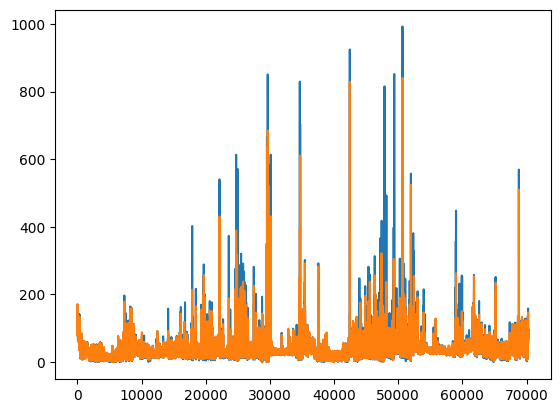

In [223]:
plt.plot(y['PM2.5 (µg/m³)'])
plt.plot(pred_check)
plt.show()

In [224]:
from sklearn.metrics import r2_score

r2 = r2_score(y['PM2.5 (µg/m³)'], pred_check)
print("R² score:", r2)

R² score: 0.8698175482340792


In [229]:
import joblib
joblib.dump(model, 'AndhraPradesh_PM2.5_µgm³.pkl')

['AndhraPradesh_PM2.5_µgm³.pkl']

In [230]:
model.fit(X, y['PM10 (µg/m³)'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [231]:
pred_check2 = model.predict(X)

In [233]:
r2 = r2_score(y['PM10 (µg/m³)'], pred_check2)
print("R² score:", r2)

R² score: 0.8668038722258697


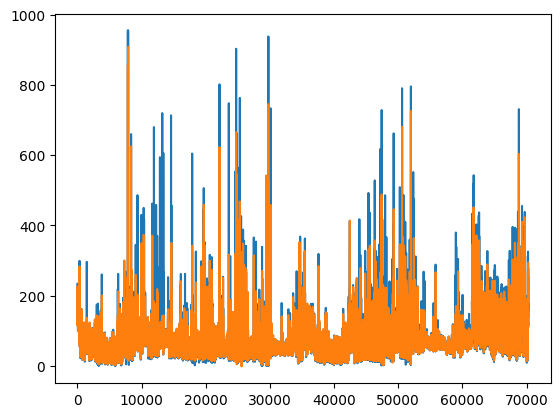

In [234]:
plt.plot(y['PM10 (µg/m³)'])
plt.plot(pred_check2)
plt.show()

In [235]:
joblib.dump(model, 'AndhraPradesh_PM10_µgm³.pkl')

['AndhraPradesh_PM10_µgm³.pkl']